## Cyclistic bike-share analysis 
#### for Google Data Analytics Specialization Certification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Loading dataframes

In [2]:
df_1 = pd.read_csv('Divvy_Trips_2019_Q1.csv', parse_dates=['start_time', 'end_time'])
df_2 = pd.read_csv('Divvy_Trips_2020_Q1.csv', parse_dates=['started_at', 'ended_at'])

### Explore data

#### Checking column names

In [3]:
df_2.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [4]:
df_1.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

#### Deleting unneeded columns

In [5]:
df_2_temp = df_2.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng', 'rideable_type'], axis=1)

In [6]:
df_1_temp = df_1.drop(['gender', 'birthyear', 'bikeid'], axis=1)

#### Checking columns once again

In [7]:
df_1_temp.columns

Index(['trip_id', 'start_time', 'end_time', 'tripduration', 'from_station_id',
       'from_station_name', 'to_station_id', 'to_station_name', 'usertype'],
      dtype='object')

In [8]:
df_2_temp.columns

Index(['ride_id', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id',
       'member_casual'],
      dtype='object')

In [9]:
print(len(df_2_temp.columns), ' = > ', len(df_1_temp.columns))

8  = >  9


#### Checking the information format on each dataset

In [10]:
df_1_temp.loc[0]

trip_id                               21742443
start_time                 2019-01-01 00:04:37
end_time                   2019-01-01 00:11:07
tripduration                             390.0
from_station_id                            199
from_station_name       Wabash Ave & Grand Ave
to_station_id                               84
to_station_name      Milwaukee Ave & Grand Ave
usertype                            Subscriber
Name: 0, dtype: object

In [11]:
df_2_temp.loc[0]

ride_id                       EACB19130B0CDA4A
started_at                 2020-01-21 20:06:59
ended_at                   2020-01-21 20:14:30
start_station_name    Western Ave & Leland Ave
start_station_id                           239
end_station_name         Clark St & Leland Ave
end_station_id                           326.0
member_casual                           member
Name: 0, dtype: object

#### Creating missed and crusial tripduration column in the second dataset

In [12]:
df_2_temp['tripduration'] = df_2_temp.apply(lambda row: (row['ended_at'] - row['started_at']).total_seconds(), axis=1)

#### Renaming columns in second dataset to be the same as in the first one. It woul'd help me to join dataframes easily

In [13]:
df_2_temp = df_2_temp.rename(columns={'started_at':'start_time',
                                      'ended_at':'end_time',
                                      'ride_id':'trip_id',
                                      'start_station_name':'from_station_name',
                                      'start_station_id':'from_station_id',
                                      'end_station_name':'to_station_name',
                                      'end_station_id':'to_station_id',
                                      'member_casual':'usertype',})

#### Adjusting data types in both dataframes

In [14]:
type(df_1_temp.loc[0, 'trip_id'])

numpy.int64

In [15]:
df_1_temp['trip_id'] = df_1_temp['trip_id'].astype(str)

In [16]:
type(df_1_temp.loc[0, 'trip_id']) == type(df_2_temp.loc[0, 'trip_id'])

True

In [17]:
for column_name in df_1_temp.columns:
  df_1_type = type(df_1_temp.loc[0, column_name])
  df_2_type = type(df_2_temp.loc[0, column_name])
  if(df_1_type == df_2_type):
    print(column_name, '\tOK')
  else:
    print(column_name, '\tNOK', df_1_type, ' => ', df_2_type)

trip_id 	OK
start_time 	OK
end_time 	OK
tripduration 	NOK <class 'str'>  =>  <class 'numpy.float64'>
from_station_id 	OK
from_station_name 	OK
to_station_id 	NOK <class 'numpy.int64'>  =>  <class 'numpy.float64'>
to_station_name 	OK
usertype 	OK


In [18]:
df_1_temp['to_station_id'] = df_1_temp['to_station_id'].astype('float64')

In [19]:
df_1_temp['tripduration'] = df_1_temp['tripduration'].str.replace(',', '').astype('float64')

In [20]:
df_1_temp['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [21]:
df_2_temp['usertype'].unique()

array(['member', 'casual'], dtype=object)

#### Adjusting usertype to be the same in both datasets

In [22]:
df_2_temp.loc[df_2_temp['usertype'] == 'member', 'usertype'] = 'Subscriber'
df_2_temp.loc[df_2_temp['usertype'] == 'casual', 'usertype'] = 'Customer'

#### Merging datasets

In [23]:
merged_df = pd.concat([df_1_temp, df_2_temp], ignore_index=True)

#### Looking for empty values

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791956 entries, 0 to 791955
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            791956 non-null  object        
 1   start_time         791956 non-null  datetime64[ns]
 2   end_time           791956 non-null  datetime64[ns]
 3   tripduration       791956 non-null  float64       
 4   from_station_id    791956 non-null  int64         
 5   from_station_name  791956 non-null  object        
 6   to_station_id      791955 non-null  float64       
 7   to_station_name    791955 non-null  object        
 8   usertype           791956 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 54.4+ MB


In [25]:
null_rows_indices = merged_df[merged_df.isnull().any(axis=1)].index
null_rows_indices

Index([779495], dtype='int64')

#### One row with empty values was found. Tripduration column is negative, so it is probably was the error in the application.

In [26]:
merged_df.loc[null_rows_indices]

,trip_id,start_time,end_time,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype
779495,157EAA4C4A3C8D36,2020-03-16 11:23:36,2020-03-16 11:23:24,-12.0,675,HQ QR,NaN,NaN,Customer


In [27]:
merged_df = merged_df.drop(null_rows_indices)

#### No more empty values were left

In [28]:
merged_df.isna().sum()

trip_id              0
start_time           0
end_time             0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
dtype: int64

### Visualization

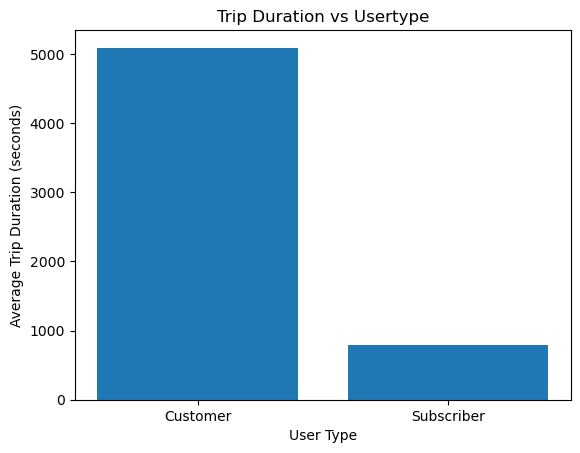

In [71]:
aggregated_data_user_duration = merged_df.groupby('usertype')['tripduration'].mean().reset_index()

plt.bar(aggregated_data_user_duration['usertype'], aggregated_data_user_duration['tripduration'])
plt.title('Trip Duration vs Usertype')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

#### From the chart above we can see that usual customers without subscription have spent a lot more time using bycicles than subsribed users.

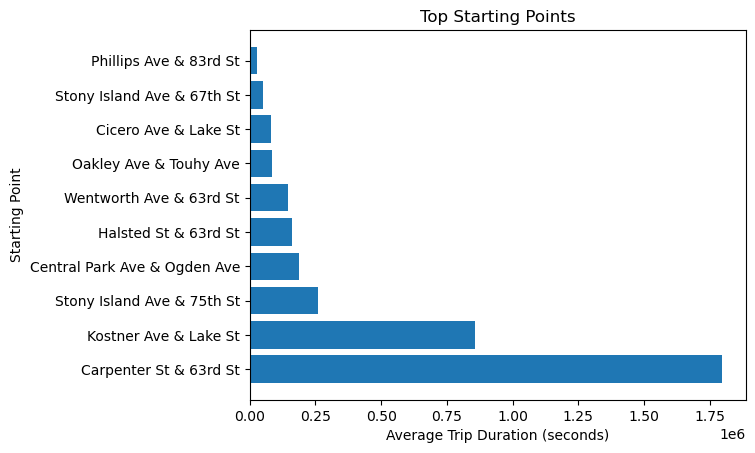

In [73]:
aggregated_data = merged_df.groupby('from_station_name')['tripduration'].mean().reset_index()
sorted_agg_data = aggregated_data.sort_values(by='tripduration', ascending=False)
top_10_regions = sorted_agg_data.head(10)
top_10_regions

plt.barh(top_10_regions['from_station_name'], top_10_regions['tripduration'])
plt.title('Top Starting Points')
plt.xlabel('Average Trip Duration (seconds)')
plt.ylabel('Starting Point')
plt.show()

#### The most popular starting point is 'Carpenter St & 63rd St.'. We could use this information for further analysis if this point needs extended amount of bicycles.

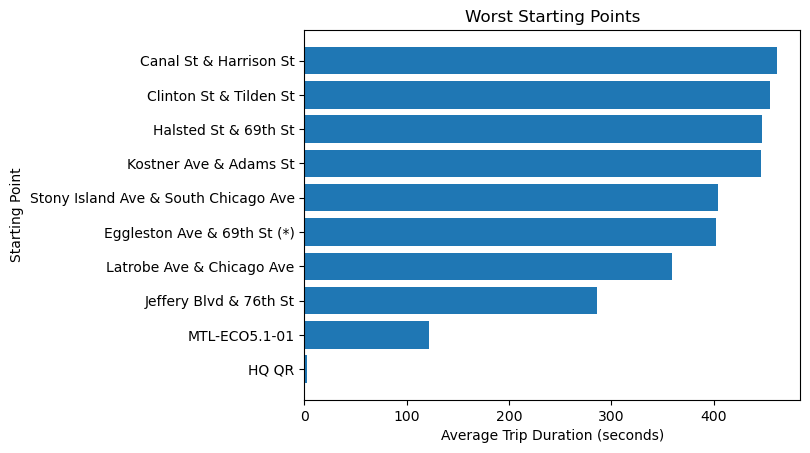

In [74]:
sorted_agg_data = aggregated_data.sort_values(by='tripduration', ascending=True)
top_10_regions = sorted_agg_data.head(10)
top_10_regions

plt.barh(top_10_regions['from_station_name'], top_10_regions['tripduration'])
plt.title('Worst Starting Points')
plt.xlabel('Average Trip Duration (seconds)')
plt.ylabel('Starting Point')
plt.show()

#### The most unpopular starting point is 'HQ QR'. It could be an error, further analysis with external data is needed. Every other point could be analyzed after more data provided. Maybe it could be possible to reduce the number of bycicles at these points to reduce the cost of maintenance.

My first data analysis ever. The project is too simple, because there is almost no data, so I had almost nothing to analyze. But I like the fact, that the dataframes were different and it took some time (about 30 minutes) to restructure the data.

P.S. When I finished it, I understood that there are a lot of things to analyze, so I'll difinitelly extend it